In [31]:
# ============================
# IMPORTACIÓN DE LIBRERÍAS
# ============================

import pandas as pd          # Manipulación y análisis de datos
import numpy as np           # Operaciones numéricas
import os                    # Manejo de rutas del sistema

import matplotlib.pyplot as plt  # Visualización básica
import seaborn as sns             # Visualización estadística avanzada

In [33]:
# ============================
# CARGA DEL ARCHIVO
# ============================

# Se cambió pd.read_csv por pd.read_json porque el archivo .log
# contiene datos en formato JSON por líneas (JSON Lines).
# El parámetro lines=True permite leer cada línea como un JSON independiente.

df = pd.read_json(
     "D:/Usuarios/Msreyesc/Desktop/20250929-enroll.log",
    lines=True
)

# Vista preliminar de los datos
df.head()

# Información general del DataFrame (tipos de datos y valores nulos)
df.info()

# Muestra los nombres de las columnas
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   tiempo   1000000 non-null  object 
 1   estado   1000000 non-null  int64  
 2   metodo   1000000 non-null  object 
 3   pedido   1000000 non-null  object 
 4   server   1000000 non-null  object 
 5   baliza   1000000 non-null  object 
 6   acceso   1000000 non-null  object 
 7   fuentes  1000000 non-null  object 
 8   decode   1000000 non-null  float64
 9   detect   1000000 non-null  float64
 10  refine   1000000 non-null  float64
 11  assess   1000000 non-null  int64  
 12  vector   1000000 non-null  float64
 13  search   1000000 non-null  int64  
 14  verify   1000000 non-null  int64  
 15  commit   1000000 non-null  float64
 16  entire   1000000 non-null  float64
 17  rostros  995006 non-null   object 
 18  envase   1000000 non-null  object 
 19  nombre   1000000 non-null  object 
dtypes: 

Index(['tiempo', 'estado', 'metodo', 'pedido', 'server', 'baliza', 'acceso',
       'fuentes', 'decode', 'detect', 'refine', 'assess', 'vector', 'search',
       'verify', 'commit', 'entire', 'rostros', 'envase', 'nombre'],
      dtype='object')

In [34]:
# ============================
# ESTADÍSTICAS DESCRIPTIVAS
# ============================

# Se selecciona la columna que se analiza
columna = "entire"
serie = df[columna]

# Cálculo de medidas estadísticas
media = serie.mean()        # Promedio
varianza = serie.var()      # Dispersión respecto a la media
mediana = serie.median()    # Valor central
moda = serie.mode()         # Valor más frecuente
curtosis = serie.kurt()     # Concentración de datos en las colas
sesgo = serie.skew()        # Asimetría de la distribución

# Crea una tabla de resumen con las estadísticas
resumen = pd.DataFrame({
    "Medida": [
        "Media",
        "Varianza",
        "Mediana",
        "Moda",
        "Curtosis",
        "Sesgo"
    ],
    "Valor": [
        media,
        varianza,
        mediana,
        moda.iloc[0],  # Se toma el primer valor en caso de múltiples modas
        curtosis,
        sesgo
    ]
})

resumen

,Medida,Valor
0,Media,89.010781
1,Varianza,5245.599028
2,Mediana,49.214000
3,Moda,38.847000
4,Curtosis,-0.869164
5,Sesgo,0.840280


In [35]:
# ============================
# FILTRADO DE VARIABLES NUMÉRICAS
# ============================

# Se seleccionan únicamente columnas tipo entero y flotante
df_numerico = df.select_dtypes(include=["int64", "float64"])

df_numerico.head()

,estado,decode,detect,refine,assess,vector,search,verify,commit,entire
0,201,4.608,28.505,0.644,0,65.000,0,0,8.551,116.694
1,201,0.937,50.442,1.092,0,48.243,0,0,20.784,188.203
2,201,1.138,9.653,1.031,0,47.869,0,0,29.118,254.183
3,201,1.647,40.606,0.893,0,59.263,0,0,18.348,312.169
4,201,0.935,40.269,0.607,0,71.577,0,0,15.567,325.665


In [36]:
# ============================
# NORMALIZACIÓN DE DATOS
# ============================

from sklearn.preprocessing import MinMaxScaler

# Columnas que contienen métricas de tiempo
columnas_stats = [
    'decode', 'detect', 'refine', 'assess',
    'vector', 'search', 'verify', 'commit', 'entire'
]

# MinMaxScaler transforma los valores en un rango de 0 a 1
scaler = MinMaxScaler()

df_norm = df.copy()

# Se normalizan únicamente las columnas seleccionadas
df_norm[columnas_stats] = scaler.fit_transform(df[columnas_stats])

<Figure size 1400x700 with 0 Axes>

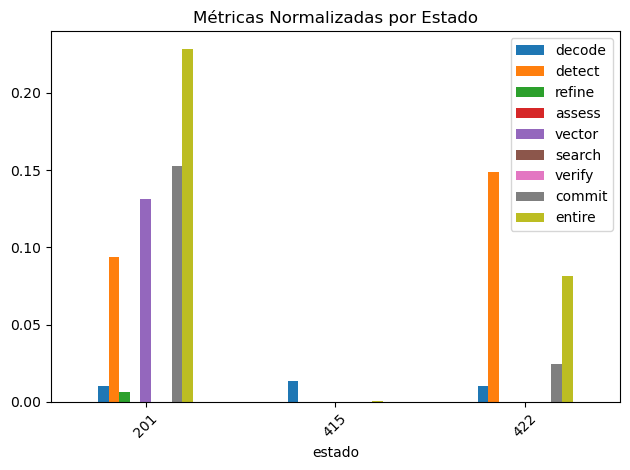

In [37]:
# ============================
# PROMEDIO POR ESTADO
# ============================

# Se agrupan los datos por la columna "estado"
# y se calcula el promedio de cada métrica normalizada
df_prom = df_norm.groupby("estado")[columnas_stats].mean()

# Muestra una gráfica de barras
plt.figure(figsize=(14,7))
df_prom.plot(kind="bar")

plt.title("Métricas Normalizadas por Estado")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

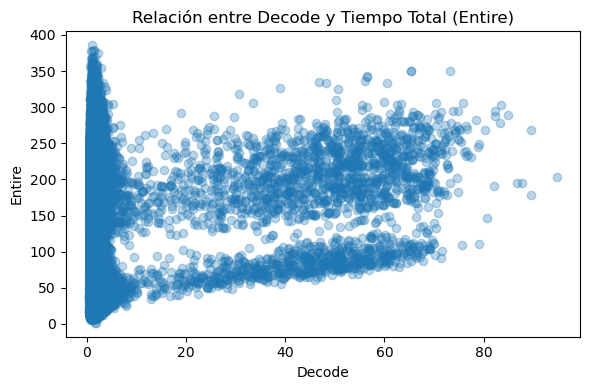

In [38]:
# ============================
# GRÁFICA DE DISPERSIÓN
# ============================

plt.figure(figsize=(6,4))

# Relación entre el tiempo de decode y el tiempo total
plt.scatter(df["decode"], df["entire"], alpha=0.3)

plt.title("Relación entre Decode y Tiempo Total (Entire)")
plt.xlabel("Decode")
plt.ylabel("Entire")

plt.tight_layout()
plt.show()

In [39]:
# ============================
# MATRIZ DE CORRELACIÓN
# ============================

# Cálculo de correlaciones entre variables numéricas
correlacion = df_numerico.corr()

correlacion

,estado,decode,detect,refine,assess,vector,search,verify,commit,entire
estado,1.000000,-0.000096,0.068219,-0.084276,NaN,-0.164225,NaN,NaN,-0.045029,-0.054990
decode,-0.000096,1.000000,-0.004442,0.109840,NaN,0.047923,NaN,NaN,0.031295,0.066863
detect,0.068219,-0.004442,1.000000,0.063983,NaN,0.278494,NaN,NaN,0.325143,0.455076
refine,-0.084276,0.109840,0.063983,1.000000,NaN,0.071709,NaN,NaN,0.022556,0.055754
assess,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector,-0.164225,0.047923,0.278494,0.071709,NaN,1.000000,NaN,NaN,0.206664,0.352526
search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verify,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commit,-0.045029,0.031295,0.325143,0.022556,NaN,0.206664,NaN,NaN,1.000000,0.981203
entire,-0.054990,0.066863,0.455076,0.055754,NaN,0.352526,NaN,NaN,0.981203,1.000000


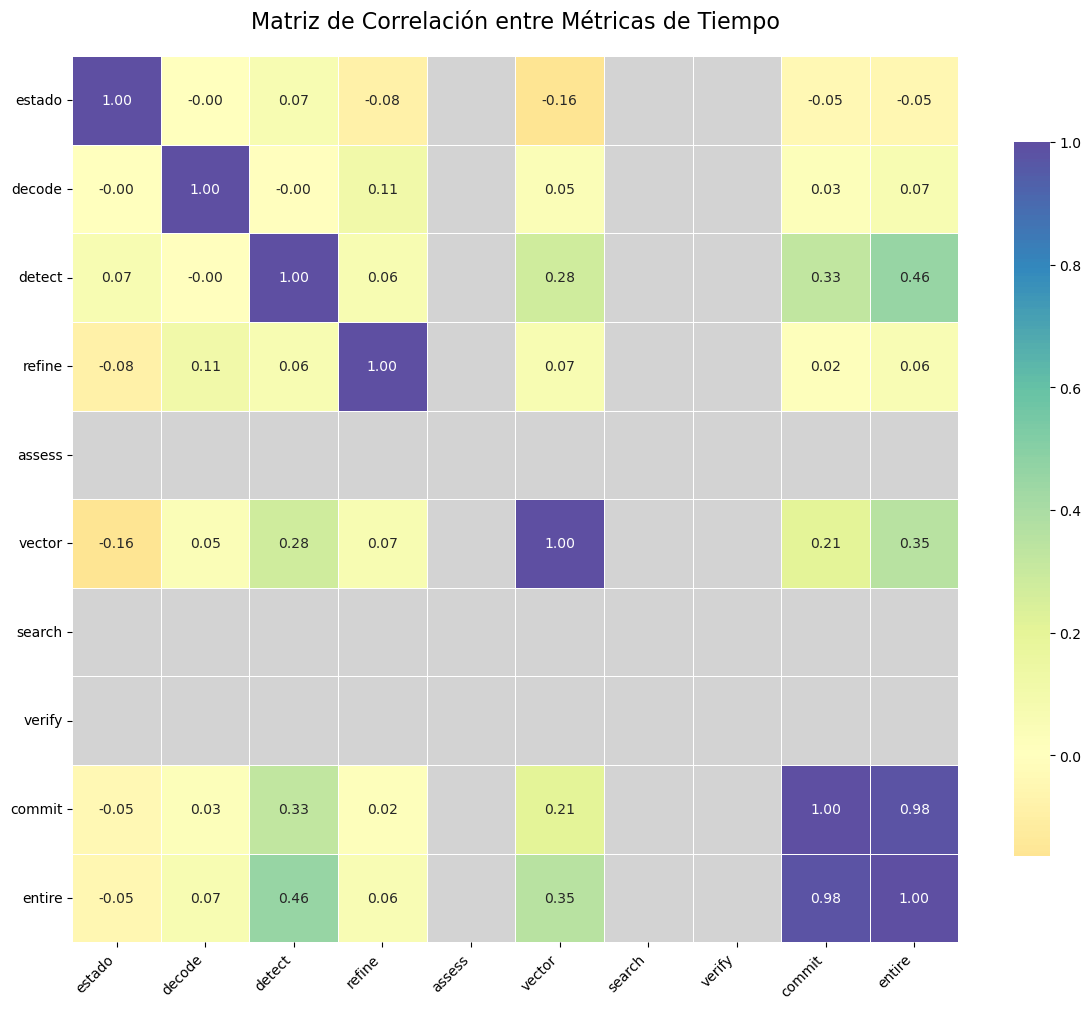

In [40]:
# ============================
# MAPA DE CALOR (HEATMAP)
# ============================

plt.figure(figsize=(12,10))

# Se usa la paleta "Spectral" para una visualización más colorida
cmap = sns.color_palette("Spectral", as_cmap=True)
cmap.set_bad(color="lightgray")

sns.heatmap(
    correlacion,
    cmap=cmap,
    annot=True,       # Mostrar valores numéricos
    fmt=".2f",        # Dos decimales
    linewidths=0.5,
    linecolor="white",
    square=True,
    center=0,         # Centra el color en 0 (clave en correlación)
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Matriz de Correlación entre Métricas de Tiempo",
    fontsize=16,
    pad=20
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()